In [47]:
import numpy as np
import pandas as pd
from glob import glob
%matplotlib inline

In [2]:
import spacy
nlp = spacy.load('en')

In [75]:
class sentenceStats(): 
    def __init__(self, doc): 
        """ Takes a SpaCy document as input. """
        self.doc = doc
        self.sents = list(doc.sents)
        self.vectors = [self.countLevels(sent) for sent in self.sents]
        self.maxes = [max(vec) for vec in self.vectors]
        self.averageSent = self.averageVectors(self.vectors)
    
    def countLevels(self, sent):
        """ Create a numeric representation vector of a syntactic tree by counting the numbers
        of child nodes at each level of the tree. """
#         print('Counting levels for sentence: ', sent)
        sentRoot = sent.root
        counts = [1, len(list(sentRoot.children))]
        branches = list(sentRoot.children)
        children = []
        while branches != []: 
    #         print('---Branches: ', branches)
            for branch in branches: 
    #             print('Branch: ', branch)
    #             print('Children: ', list(branch.children))
                for child in list(branch.children): 
                    children.append(child)
    #             print('Children list: ', children)
            counts.append(len(children))
            branches = children.copy()
            children = []
        return counts

    def averageVectors(self, vectorList): 
        """ Does an element-wise average for all the vectors in a list. """
        lengths = [len(vector) for vector in vectorList]
        maxLength = max(lengths)
        for vector in vectorList: 
            while len(vector) < maxLength: 
                vector.append(0) # Zero-pad
        vectorList = np.array(vectorList)
        return vectorList.mean(axis=0) # average each column
    
    def plotAverageSent(self): 
        pd.Series(self.averageSent).plot(kind="bar")

In [40]:
def analyze(filename): 
    doc = nlp(open(filename).read())
    stats = sentenceStats(doc)
    stats.plotAverageSent()

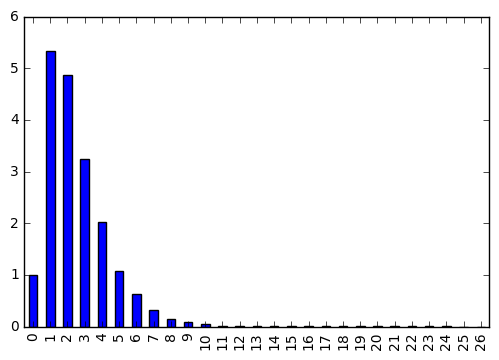

In [41]:
analyze('dickens-christmas-carol.txt')

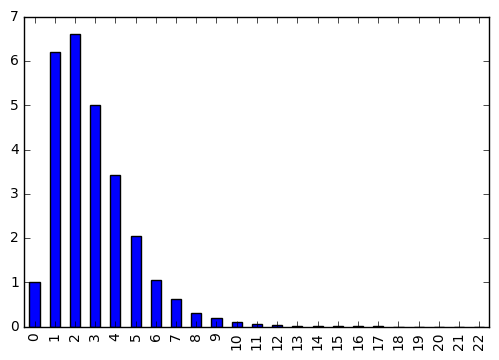

In [42]:
analyze('poe-gold-bug.txt')

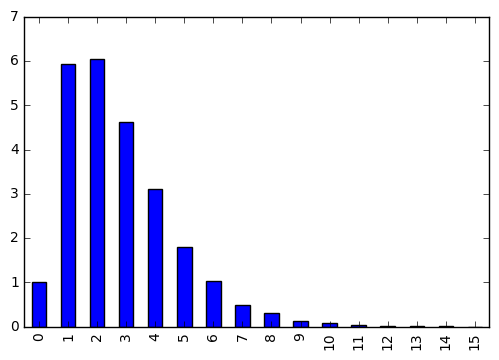

In [43]:
analyze('stevenson-markheim.txt')

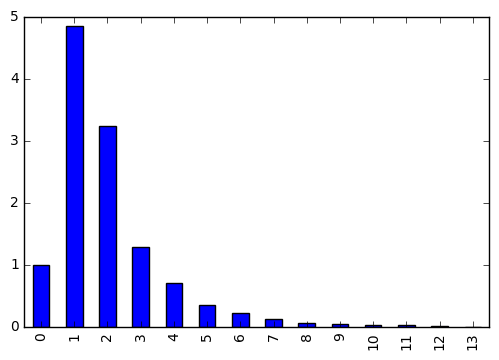

In [44]:
analyze('hemingway-well-lighted.txt')

In [76]:
def getVector(filename): 
    doc = nlp(open(filename).read())
    stats = sentenceStats(doc)
    return stats.averageSent

def getMax(filename): 
    doc = nlp(open(filename).read())
    stats = sentenceStats(doc)
    return stats.maxes
    

In [46]:
getVector('hemingway-well-lighted.txt')

array([ 1.        ,  4.84567901,  3.24074074,  1.28395062,  0.69753086,
        0.34567901,  0.21604938,  0.12345679,  0.0617284 ,  0.03703704,
        0.0308642 ,  0.02469136,  0.00617284,  0.        ])

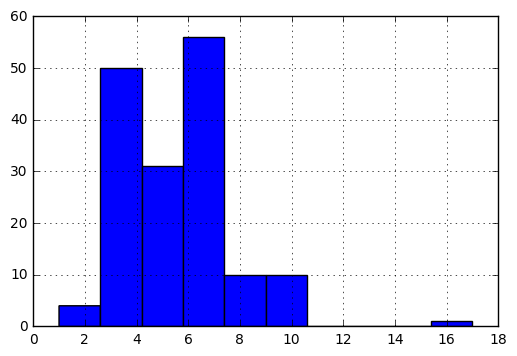

In [78]:
pd.Series(getMax('hemingway-well-lighted.txt')).hist()

In [ ]:
pd.

In [50]:
files = glob('*.txt')
files.remove('10483.txt')
files

['dickens-christmas-carol.txt',
 'stevenson-markheim.txt',
 'irving-rip.txt',
 'james-jolly-corner.txt',
 'hemingway-well-lighted.txt',
 'poe-gold-bug.txt']

In [56]:
names = [file.split('-')[0] for file in files]

In [57]:
vectors = [getVector(file) for file in files]

In [59]:
df = pd.DataFrame(vectors, index=names).T.fillna(0)

In [74]:
df.max()

dickens      5.343941
stevenson    6.036517
irving       7.867841
james        8.099815
hemingway    4.845679
poe          6.619259
dtype: float64

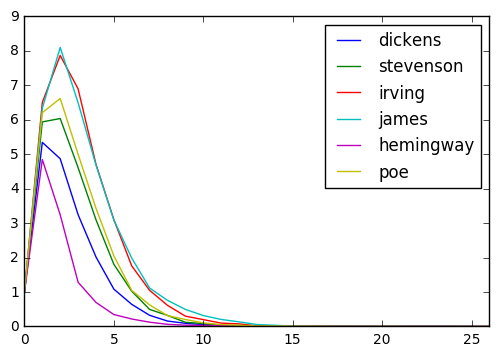

In [72]:
df.plot()